# ObsID : 0945020137, SRCNUM : 21, Instru : EMOS1
Not on Simbad

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [11]:
spec = Spectrum(glob.glob("ObsID*SRCNUM*E*spectrum_grp.fits")[0])


2 spectra  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EMOS1_spectrum_grp.fits  Spectrum 2


GammQ: A <=  0


Net count rate (cts/s) for Spectrum:2  1.387e-03 +/- 4.972e-04 (35.5 % total)
 Assigned to Data Group 1 and Plot Group 2
  Noticed Channels:  1-2
  Telescope: XMM Instrument: EMOS1  Channel Type: PI
  Exposure Time: 1.818e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945020137_SRCNUM21_EMOS1_background_spectrum.fits
  Background Exposure Time: 1.818e+04 sec
 Using Response (RMF) File            ObsID0945020137_SRCNUM21_EMOS1.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020137_SRCNUM21_EMOS1.arf


Fit statistic  : Chi-Squared              1.357250e+12     using 1 bins, spectrum 1.
                 Chi-Squared              1.357362e+12     using 2 bins, spectrum 2.
Total fit statistic                       2.714611e+12     with 0 d.o.f.

Test statistic : Chi-Squared              2.714611e+12     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.


In [14]:
print("Number of counts :", 1.387e-03*1.822e+04)

Number of counts : 25.27114


## Plot spectrum

In [12]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
#spec.ignore("**-0.2 12-**")

***Warning: Fit is not current.


(-0.5, 865.5, 666.5, -0.5)

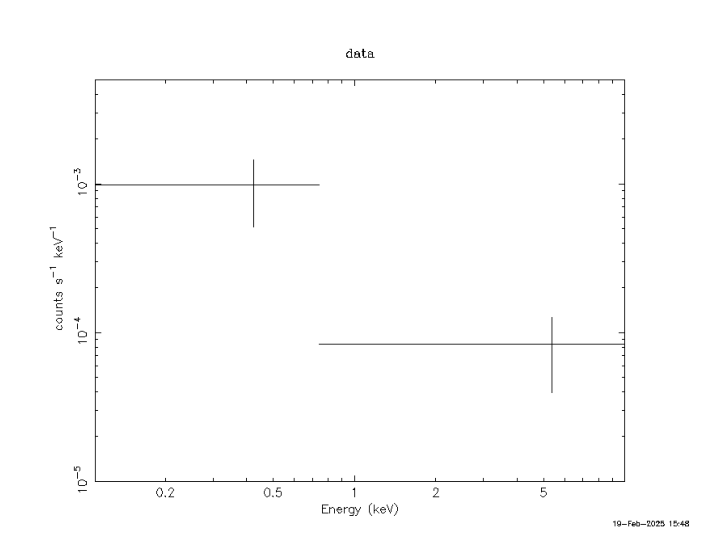

In [6]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum.png")[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [13]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.357250e+12     using 1 bins, spectrum 1.
                 Chi-Squared              1.357362e+12     using 2 bins, spectrum 2.
Total fit statistic                       2.714611e+12     with 0 d.o.f.

Test statistic : Chi-Squared              2.714611e+12     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
4.38078      0.00173034   -2     0.0323241       3.16883   1.38645e-06


GammQ: A <=  0
GammQ: A <=  0


44290e-06
4.26874      38589.3       0   7.52387e-17       3.10171   1.44523e-06
4.26649      32815.9       0   3.51553e-17       3.09411   1.45085e-06
4.266        17434.7       0   9.26781e-18       3.09092   1.45199e-06
4.26585      12322.3       0   3.05595e-18       3.08917   1.45166e-06
***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 3.05595e-18 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
4.26476      15937.2      -1   3.05595e-18       3.06331   1.43575e-06
4.258        2753.32      -2   3.05595e-18       2.85548   1.22428e-06
4.23783      23501.6      -3   3.05595e-18      0.574376   1.91983e-07
3.74324      9.60385e+06  -4   3.05595e-18      0.158695   9.16315e-08
0.398994     1.36073e+07  -5   3.05595e-18      0.246761   1.61028e-07
0.0282489    1.94806e+06  -6   3.05595e-18      0.203925   1.64574e-07
5.70194e-06  818918       -7   3.05595e-18      0.210759   1.66331e-07
1.32457

(-0.5, 857.5, 666.5, -0.5)

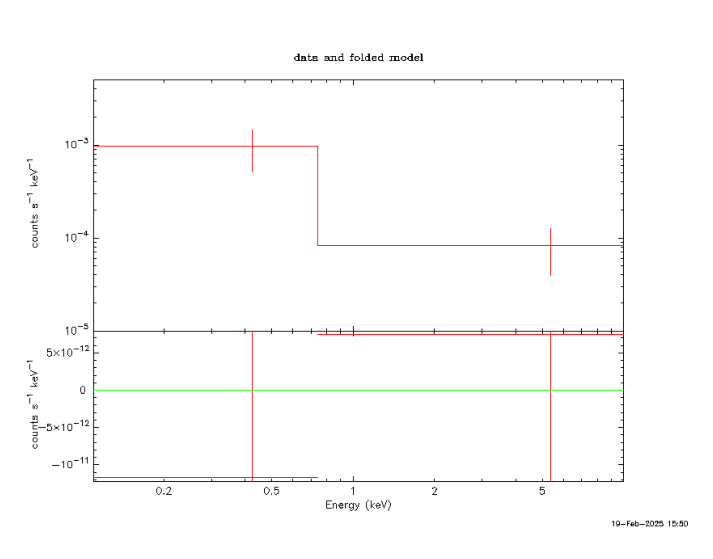

In [11]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [15]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.077664e+10     using 1 bins, spectrum 1.
                 Chi-Squared              7.079411e+10     using 2 bins, spectrum 2.
Total fit statistic                       1.415708e+11     with 0 d.o.f.

Test statistic : Chi-Squared              1.415708e+11     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
3.01234      0.012546     -2      0.119199       1.39186   5.77355e-06

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 861.5, 666.5, -0.5)

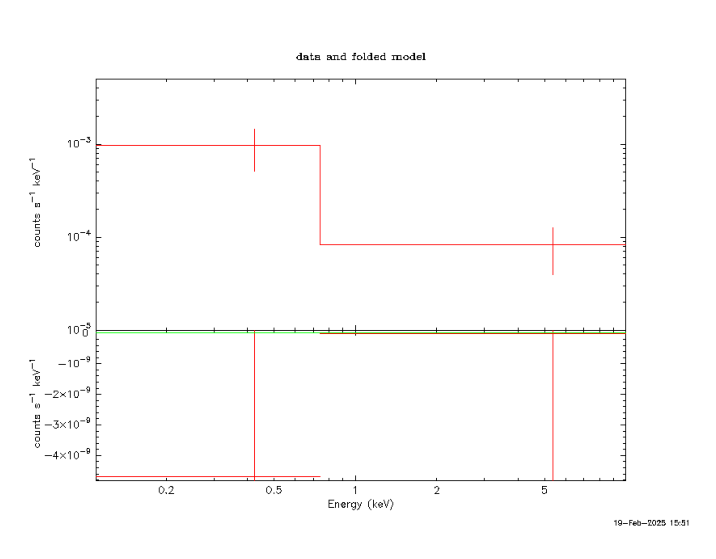

In [13]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [16]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              9.156742e+09     using 1 bins, spectrum 1.
                 Chi-Squared              9.163869e+09     using 2 bins, spectrum 2.
Total fit statistic                       1.832061e+10     with 0 d.o.f.

Test statistic : Chi-Squared              1.832061e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                 

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 859.5, 662.5, -0.5)

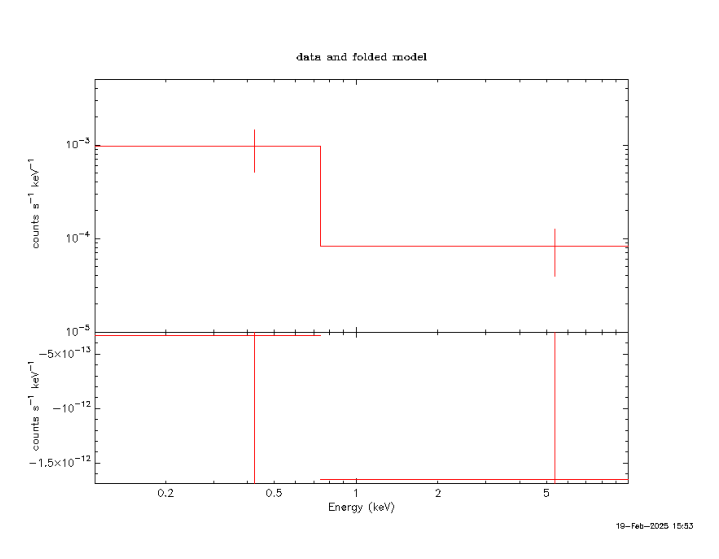

In [15]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apec.png")[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [17]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.301678e+11     using 1 bins, spectrum 1.
                 Chi-Squared              4.302397e+11     using 2 bins, spectrum 2.
Total fit statistic                       8.604075e+11     with 0 d.o.f.

Test statistic : Chi-Squared              8.604075e+11     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
2.47819      0.00883394   -2     0.0339764       1.37128   2.26828e-

GammQ: A <=  0
GammQ: A <=  0


onal element for parameter 2
***Warning: LevMarq::invertCorrelationMatrix: 
            Negative diagonal element for parameter 3
 Variances and Principal Axes
                 1        2        3  
 2.0464E-14| -0.0564  -0.9984  -0.0000  
 2.0464E-12|  0.0000  -0.0000   1.0000  
 1.7063E-03|  0.9984  -0.0564  -0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
  -2.173e+12  -3.844e+13  -6.585e+07
  -3.844e+13  -6.800e+14  -1.165e+09
  -6.585e+07  -1.165e+09  -1.995e+03
------------------------------------

Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    5.29904E-11  +/-  -1.00000     
   2    2   powerlaw   PhoIndex            2.05740      +/-  -1.00000     
   3    2   powerlaw   norm                3.27186E-06  +/-  -1.00000     
________________________________________________________________________


Fit statistic  : 

(-0.5, 861.5, 664.5, -0.5)

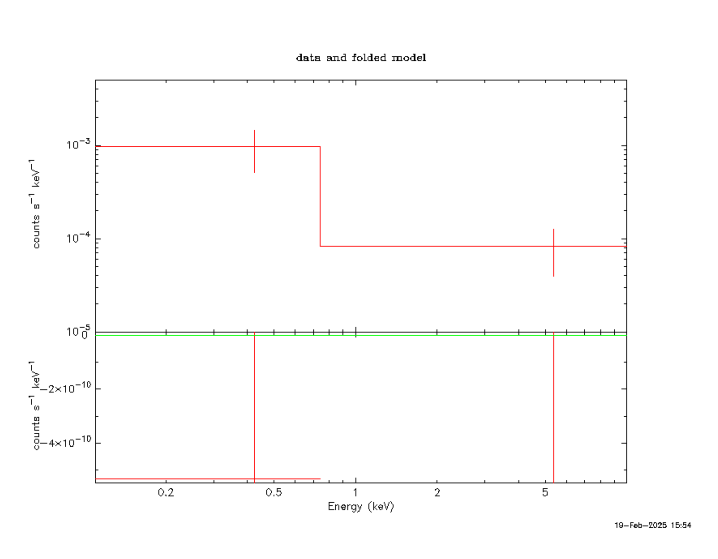

In [17]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_powerlaw.png")[0]))
plt.imshow(img)
plt.axis('off')

## ESASky
Aucune distance n'est diponible sur ESASky. https://sky.esa.int/esasky/?target=52.73766666666666%20-28.63463888888889&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033057.0-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.7376939°
- Dec = -28.6344882°

52.74 -28.63

**Column density :** nH = 3*10^20 cm^-2 ?

The different models give a column density of :

- bbody : nH = 3.05595*10^4
- bremss : nH = 3.10796*10^19
- apec : nH = 2.34999*10^21
- powerlaw : nH = 5.29904*10^11

No value corresponds.

## Flux

In [18]:
AllModels.calcFlux(".2 12.0")

Spectrum Number: 1, 2
Data Group Number: 1
 Model Flux 1.6745e-05 photons (2.0979e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [21]:
Flux = 2.0704e-14 # ergs/cm^2/s

## Luminosity
No distance available on ESASky.

In [22]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s

print(color.BOLD+"For a star in the milky way? with d=[1 pc - 30 kpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

For a star in the milky way? with d=[1 pc - 30 kpc] :
Luminosity : [2.477259622494234e+24, 2.477259622494234e+30] erg/s


In [23]:
# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s


print(color.BOLD+"For a galaxy? with d=[1 Mpc - 10 Gpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

For a galaxy? with d=[1 Mpc - 10 Gpc] :
Luminosity : [2.4772596224942343e+36, 2.4772596224942344e+44] erg/s


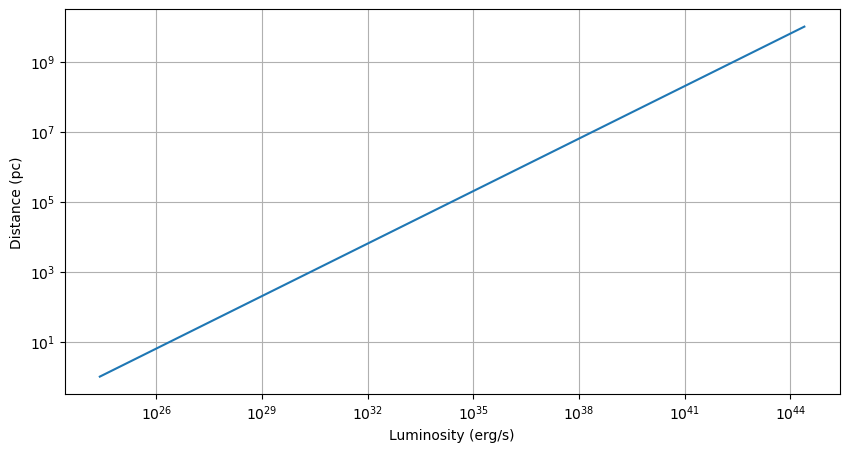

In [24]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L = 4*np.pi*Flux*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L,D_pc)
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.xscale("log")
plt.yscale("log")
plt.grid()